# San Francisco Fire Department Battalion Response Times

In [1]:
# API query methods from the https://dev.socrata.com/foundry/data.sfgov.org/nuek-vuh3 documentation and examples

# make sure to install these packages if necessary before running API query:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata
import datetime as dt

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sfgov.org", None)

# establish query date to extract 1 year of data from today's date
date = dt.datetime.now() - dt.timedelta(days=365)
year_ago = date.strftime("%Y-%m-%d")

# Retrieve results from the SFFD data source for all calls in the past year including call date, battalion, received time,
# and on scene time, sorted ascending by date.
results = client.get_all("nuek-vuh3",
                         where=f"call_date > '{year_ago}T00:00:00.000'",
                         select="call_date, battalion, received_dttm, on_scene_dttm",
                         order="call_date ASC")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [2]:
# view dataframe created from query results
results_df.head()

,call_date,battalion,received_dttm,on_scene_dttm
0,2020-03-13T00:00:00.000,B07,2020-03-13T16:20:26.000,2020-03-13T16:28:25.000
1,2020-03-13T00:00:00.000,B09,2020-03-13T00:32:53.000,2020-03-13T00:37:43.000
2,2020-03-13T00:00:00.000,B05,2020-03-13T17:00:20.000,2020-03-13T17:11:39.000
3,2020-03-13T00:00:00.000,B10,2020-03-13T10:11:24.000,NaN
4,2020-03-13T00:00:00.000,B03,2020-03-13T15:12:14.000,2020-03-13T15:18:02.000


In [3]:
# evaluate column data types
results_df.dtypes

call_date        object
battalion        object
received_dttm    object
on_scene_dttm    object
dtype: object

In [4]:
# drop rows with missing data
refined_df = results_df.dropna(how='any')
refined_df.head()

,call_date,battalion,received_dttm,on_scene_dttm
0,2020-03-13T00:00:00.000,B07,2020-03-13T16:20:26.000,2020-03-13T16:28:25.000
1,2020-03-13T00:00:00.000,B09,2020-03-13T00:32:53.000,2020-03-13T00:37:43.000
2,2020-03-13T00:00:00.000,B05,2020-03-13T17:00:20.000,2020-03-13T17:11:39.000
4,2020-03-13T00:00:00.000,B03,2020-03-13T15:12:14.000,2020-03-13T15:18:02.000
5,2020-03-13T00:00:00.000,B03,2020-03-13T16:00:34.000,2020-03-13T16:16:48.000


In [5]:
# Convert datatype to datetime format for call_date, received_dttm, and on_scene_dttm
refined_df['call_date'] = pd.to_datetime(refined_df['call_date'])
refined_df['received_dttm'] = pd.to_datetime(refined_df['received_dttm'])
refined_df['on_scene_dttm'] = pd.to_datetime(refined_df['on_scene_dttm'])
refined_df.head()

C:\Users\Travis Young\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Travis Young\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Travis Young\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,call_date,battalion,received_dttm,on_scene_dttm
0,2020-03-13,B07,2020-03-13 16:20:26,2020-03-13 16:28:25
1,2020-03-13,B09,2020-03-13 00:32:53,2020-03-13 00:37:43
2,2020-03-13,B05,2020-03-13 17:00:20,2020-03-13 17:11:39
4,2020-03-13,B03,2020-03-13 15:12:14,2020-03-13 15:18:02
5,2020-03-13,B03,2020-03-13 16:00:34,2020-03-13 16:16:48


In [6]:
# establish the month and response time data series
refined_df['month'] = refined_df['call_date'].dt.month
refined_df['response_time'] = refined_df['on_scene_dttm'] - refined_df['received_dttm']
refined_df.head()

C:\Users\Travis Young\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Travis Young\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,call_date,battalion,received_dttm,on_scene_dttm,month,response_time
0,2020-03-13,B07,2020-03-13 16:20:26,2020-03-13 16:28:25,3,00:07:59
1,2020-03-13,B09,2020-03-13 00:32:53,2020-03-13 00:37:43,3,00:04:50
2,2020-03-13,B05,2020-03-13 17:00:20,2020-03-13 17:11:39,3,00:11:19
4,2020-03-13,B03,2020-03-13 15:12:14,2020-03-13 15:18:02,3,00:05:48
5,2020-03-13,B03,2020-03-13 16:00:34,2020-03-13 16:16:48,3,00:16:14


In [7]:
# Use describe to get a quick statistical summary of the data
refined_df.describe()

,month,response_time
count,225476.000000,225476
mean,6.509788,0 days 00:10:15.858095
std,3.469403,0 days 00:22:17.234366
min,1.000000,-1 days +08:02:52
25%,3.000000,0 days 00:05:30
50%,7.000000,0 days 00:07:26
75%,10.000000,0 days 00:11:18.250000
max,12.000000,1 days 18:41:53


In [8]:
refined_df.dtypes

call_date         datetime64[ns]
battalion                 object
received_dttm     datetime64[ns]
on_scene_dttm     datetime64[ns]
month                      int64
response_time    timedelta64[ns]
dtype: object

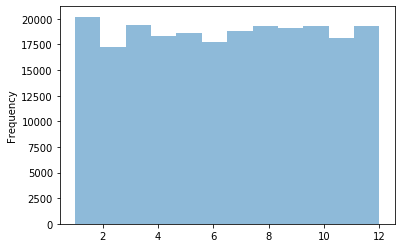

In [9]:
# plot hisotgram to confirm data is representative of past 12 months
ax = refined_df['month'].plot.hist(bins=12, alpha=0.5)

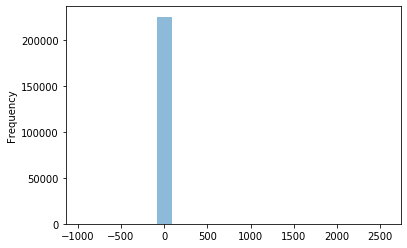

In [10]:
# take a look at the time distribution for response time
refined_df['response_time'].astype('timedelta64[m]').plot.hist(bins=20, alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x207a8a0d9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x207a8a6c0f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x207a8a0d630>],
 'medians': [<matplotlib.lines.Line2D at 0x207a8a6c780>],
 'fliers': [<matplotlib.lines.Line2D at 0x207a8a6cac8>],
 'means': []}

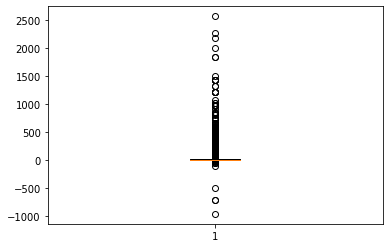

In [11]:
# Have a look at the box plot to assess the data for outliers
import matplotlib.pyplot as plt
plt.boxplot(refined_df['response_time'].astype('timedelta64[m]'))

For this example, the majority of calls have a response time of pretty close to zero minutes as shown by the histogram.  All negative response time data should be removed as it is likely a data entry error.  The box plot reveals a lot of outliers in the data on the long response time side of the data.  Where most of the data falls within 3 standard deviations of the mean, I am going to compare the data using and upper limit of +3 std dev from the mean to an upper limit to 24 hours (1,440 minutes or 86,400 seconds) because the box plots shows a number of values outside this range.  

### Data using a range of 1 second to 3 standard deviations above the mean

In [12]:
# import numpy to find mean and standard deviation for response_time
import numpy as np

In [13]:
# find the mean and standard deviation for the refined dataset
mean = np.mean(refined_df['response_time'])
print(mean)
stdDev = np.std(refined_df['response_time'])
stdDev

0 days 00:10:15.858095


Timedelta('0 days 00:22:17.231400')

In [14]:
# reduce data to response times of at least 1 second up to 3 standard deviations longer than the mean response time
response_df = refined_df[refined_df['response_time'] >= pd.Timedelta(1, 's')]
response_df = response_df[response_df['response_time'] <= pd.Timedelta(1, 'd')]
response_df = response_df[response_df['response_time'] <= pd.Timedelta((3*stdDev+mean), 's')]
response_df.head()

,call_date,battalion,received_dttm,on_scene_dttm,month,response_time
0,2020-03-13,B07,2020-03-13 16:20:26,2020-03-13 16:28:25,3,00:07:59
1,2020-03-13,B09,2020-03-13 00:32:53,2020-03-13 00:37:43,3,00:04:50
2,2020-03-13,B05,2020-03-13 17:00:20,2020-03-13 17:11:39,3,00:11:19
4,2020-03-13,B03,2020-03-13 15:12:14,2020-03-13 15:18:02,3,00:05:48
5,2020-03-13,B03,2020-03-13 16:00:34,2020-03-13 16:16:48,3,00:16:14


In [15]:
# statistical summary
response_df.describe()

,month,response_time
count,222340.000000,222340
mean,6.508905,0 days 00:09:41.828024
std,3.470102,0 days 00:07:03.716165
min,1.000000,0 days 00:00:02
25%,3.000000,0 days 00:05:33
50%,7.000000,0 days 00:07:28
75%,10.000000,0 days 00:11:20
max,12.000000,0 days 01:17:07


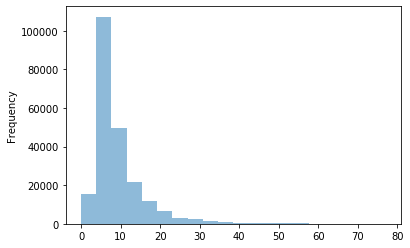

In [16]:
# take a look at the time distribution for response time
response_df['response_time'].astype('timedelta64[m]').plot.hist(bins=20, alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x207a906dcf8>,
 'caps': [<matplotlib.lines.Line2D at 0x207a9092438>,
 'boxes': [<matplotlib.lines.Line2D at 0x207a906dba8>],
 'medians': [<matplotlib.lines.Line2D at 0x207a9092ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x207a9092e10>],
 'means': []}

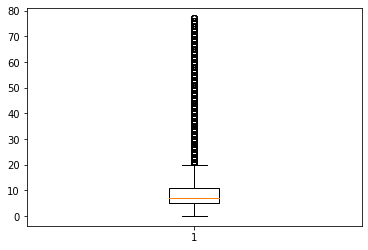

In [17]:
plt.boxplot(response_df['response_time'].astype('timedelta64[m]'))

### Data using range of 1 second to 86,400 seconds (24 hours)

In [18]:
# reduce data to response times of at least 1 second up to 1440 minutes
response2_df = refined_df[refined_df['response_time'] >= pd.Timedelta(1, 's')]
response2_df = response2_df[response2_df['response_time'] <= pd.Timedelta(1, 'd')]
response2_df = response2_df[response2_df['response_time'] <= pd.Timedelta(86400, 's')]
response2_df.head()

,call_date,battalion,received_dttm,on_scene_dttm,month,response_time
0,2020-03-13,B07,2020-03-13 16:20:26,2020-03-13 16:28:25,3,00:07:59
1,2020-03-13,B09,2020-03-13 00:32:53,2020-03-13 00:37:43,3,00:04:50
2,2020-03-13,B05,2020-03-13 17:00:20,2020-03-13 17:11:39,3,00:11:19
4,2020-03-13,B03,2020-03-13 15:12:14,2020-03-13 15:18:02,3,00:05:48
5,2020-03-13,B03,2020-03-13 16:00:34,2020-03-13 16:16:48,3,00:16:14


In [19]:
# statistical summary
response2_df.describe()

,month,response_time
count,222952.000000,222952
mean,6.509926,0 days 00:10:19.879283
std,3.469767,0 days 00:18:59.333115
min,1.000000,0 days 00:00:02
25%,3.000000,0 days 00:05:33
50%,7.000000,0 days 00:07:29
75%,10.000000,0 days 00:11:23
max,12.000000,0 days 23:54:49


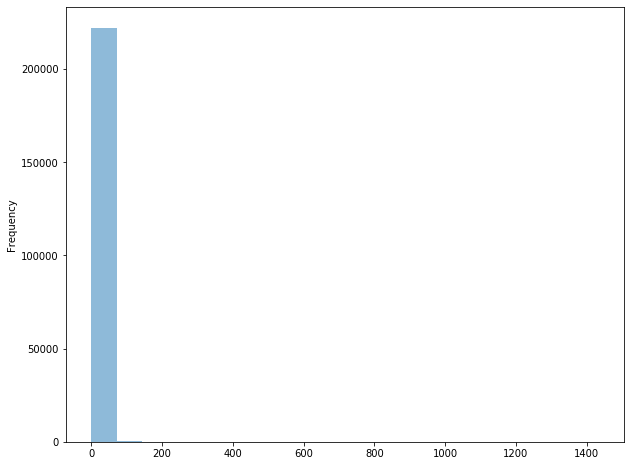

In [20]:
# take a look at the time distribution for response time
response2_df['response_time'].astype('timedelta64[m]').plot.hist(bins=20, alpha=0.5, figsize=(10, 8))

{'whiskers': [<matplotlib.lines.Line2D at 0x207a9640630>,
 'caps': [<matplotlib.lines.Line2D at 0x207a9640d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x207a96404e0>],
 'medians': [<matplotlib.lines.Line2D at 0x207a96a2400>],
 'fliers': [<matplotlib.lines.Line2D at 0x207a96a2748>],
 'means': []}

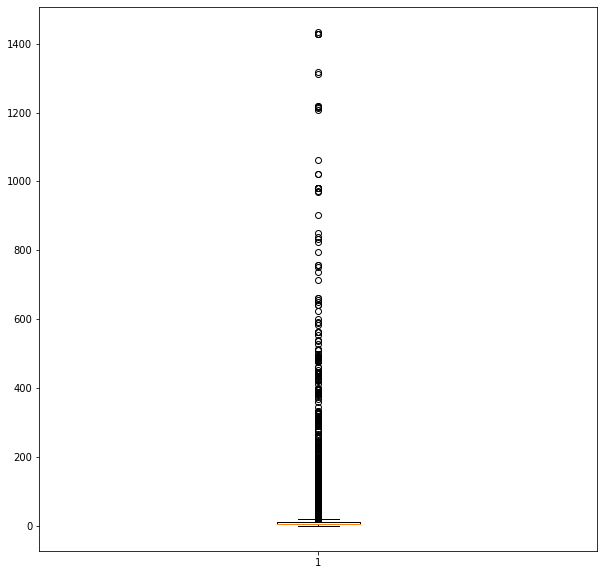

In [21]:
# look at the boxplot for outliers
plt.figure(figsize=(10, 10))
plt.boxplot(response2_df['response_time'].astype('timedelta64[m]'))

Looking at the boxplots for the two data ranges, I am choosing to move forward with the dataset ranging from 1 second to 24 hours.  There are too many datapoints beyond the quantile ranges to omit while retaining the data integrity.  Without understand the dataset better or what can explain the skew in response times I feel it best to maintain the larger dataset.  

## Preparing the CSV table for the 90th percentile of call response times

In [22]:
# Format the response time data for analysis using groupby
grouping_df = response2_df.copy()
grouping_df["response_time"] = grouping_df.loc[:, "response_time"].astype('timedelta64[s]')

# Group data by month and battalion
gb = grouping_df.groupby(['month', 'battalion'])
gb['response_time'].mean()

month  battalion
1      B01          595.673038
       B02          564.488968
       B03          612.320458
       B04          545.832836
       B05          584.109655
                       ...    
12     B07          608.347280
       B08          884.883041
       B09          670.838020
       B10          680.128780
       B99          768.262295
Name: response_time, Length: 133, dtype: float64

In [23]:
# Create new dataframe using grouped object
Response_Time_df = gb['response_time'].quantile(0.9).reset_index()

# Convert response time back to time
Response_Time_df['response_time'] = Response_Time_df['response_time'].apply(pd.to_timedelta, unit = 's').dt.floor('10ms')
Response_Time_df.head()

,month,battalion,response_time
0,1,B01,00:18:30.500000
1,1,B02,00:16:51
2,1,B03,00:19:06.600000
3,1,B04,00:16:15.400000
4,1,B05,00:17:21


In [24]:
# statistical summary
Response_Time_df.describe()

,month,response_time
count,133.000000,133
mean,6.533835,0 days 00:18:16.821804
std,3.474035,0 days 00:02:47.330715
min,1.000000,0 days 00:14:23.200000
25%,4.000000,0 days 00:16:41.400000
50%,7.000000,0 days 00:18:14
75%,10.000000,0 days 00:19:06.900000
max,12.000000,0 days 00:42:22


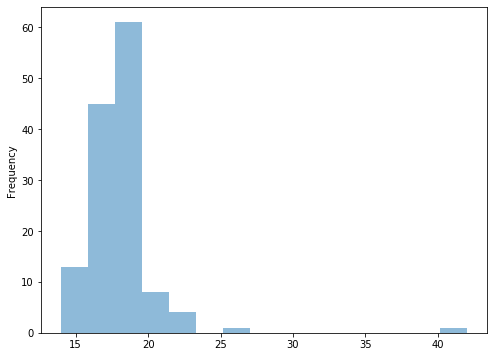

In [25]:
# histogram
Response_Time_df['response_time'].astype('timedelta64[m]').plot.hist(bins=15, alpha=0.5, figsize=(8, 6))

{'whiskers': [<matplotlib.lines.Line2D at 0x207a9c61f28>,
 'caps': [<matplotlib.lines.Line2D at 0x207a9c815f8>,
 'boxes': [<matplotlib.lines.Line2D at 0x207a9c61be0>],
 'medians': [<matplotlib.lines.Line2D at 0x207a9c81c88>],
 'fliers': [<matplotlib.lines.Line2D at 0x207a9c81fd0>],
 'means': []}

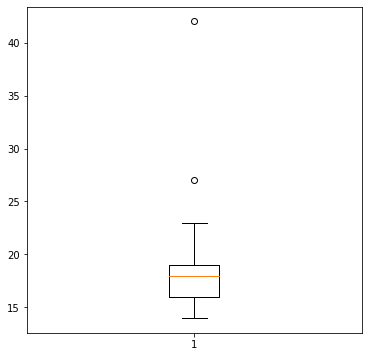

In [26]:
# boxplot
plt.figure(figsize=(6, 6))
plt.boxplot(Response_Time_df['response_time'].astype('timedelta64[m]'))

In [27]:
# Export the dataframe to a csv file named "SFFD_ResponseTime.csv"
Response_Time_df.to_csv("SFFD_ResponseTime.csv", encoding='utf-8', index=False)